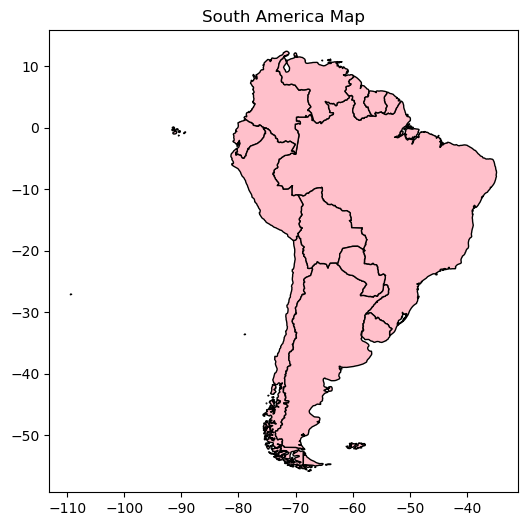

In [18]:
!pip install geopandas contextily matplotlib pandas
!pip install --upgrade contextily xyzservices
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx  

file_path = "south-america_652 (1).geojson"
southamerica = gpd.read_file(file_path)
# this will load South American GeoJson file using pandas 

# Plot the base map of South America
fig, ax = plt.subplots(figsize=(10, 6))
southamerica.plot(ax=ax, edgecolor="black", color="pink")
plt.title("South America Map")
plt.show()

#This step helps us visualize the boundaries of South American countries before adding population data.


In [19]:
# Display first few rows to make it a bit easy to check
# since we are only focusing on population distrinution we filter the dataset to include only selected countries
southamerica.head()

,name,cartodb_id,created_at,updated_at,geometry
0,French Guiana (France),1,2013-11-28 06:32:17+01:00,2013-11-28 06:33:02+01:00,"POLYGON ((-52.28892 4.87612, -52.32461 4.7709,..."
1,Brazil,33,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-48.48589 -27.76699, -48.55459..."
2,Chile,41,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-67.5752 -55.88965, -67.61143 ..."
3,Argentina,9,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-64.54917 -54.71621, -64.43882..."
4,Bolivia,32,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"POLYGON ((-58.15977 -20.16465, -58.13994 -19.9..."


In [27]:
selected_countries = ["Brazil", "Chile", "Argentina", "Uruguay", "Ecuador", "Colombia", "Peru", "Paraguay"]
filtered_df = southamerica[southamerica["name"].isin(selected_countries)]


# Create population data and marge it with our geographical data
population_data = {
    "Country": ["Brazil", "Chile", "Argentina", "Uruguay", "Ecuador", "Colombia", "Peru", "Paraguay"],
    "Population": [213000000, 19000000, 45000000, 3500000, 17800000, 50800000, 33000000, 7100000]
}

population_df = pd.DataFrame(population_data)

merged_df = filtered_df.merge(population_df, left_on="name", right_on="Country")

# By merging population data with geographical boundaries, we can visualize population distributions effectively.


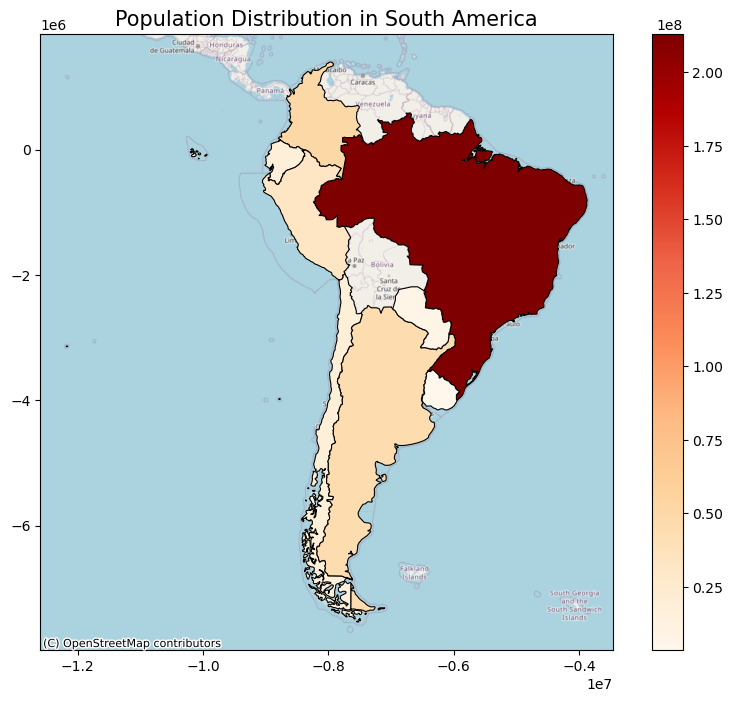

In [28]:
merged_df = merged_df.to_crs(epsg=3857)

# Plot Population Distribution Map and the plot choropleth map where the color intensity represent population map 
fig, ax = plt.subplots(figsize=(10, 8))
merged_df.plot(column="Population", cmap="OrRd", linewidth=0.8, edgecolor="black", legend=True, ax=ax)

ax.set_title("Population Distribution in South America", fontsize=15)


ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)


plt.show()

# This step visualizes population distribution using color intensity and overlays it on a real-world map using OpenStreetMap.
#Brazil has the largest population, as seen by its dark red color, with over 213 million people.


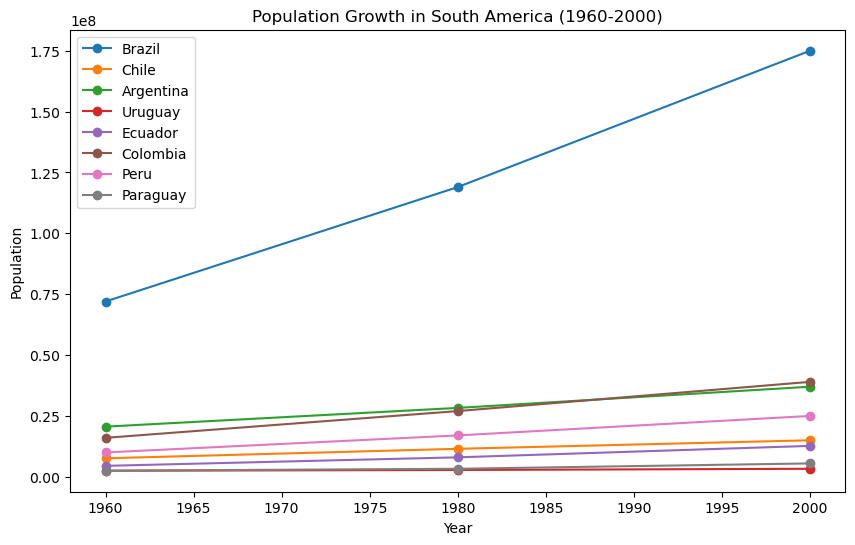

In [17]:
southamerica = gpd.read_file(file_path)
selected_countries = ["Brazil", "Chile", "Argentina", "Uruguay", "Ecuador", "Colombia", "Peru", "Paraguay"]
filtered_df = southamerica[southamerica["name"].isin(selected_countries)]

# Historical population data (1960s-2000s)
population_data = {
    "Country": ["Brazil", "Chile", "Argentina", "Uruguay", "Ecuador", "Colombia", "Peru", "Paraguay"],
    "1960": [72000000, 7600000, 20600000, 2500000, 4500000, 16000000, 10000000, 2500000],
    "1980": [119000000, 11500000, 28300000, 2800000, 8000000, 27000000, 17000000, 3300000],
    "2000": [175000000, 15000000, 37000000, 3300000, 12700000, 39000000, 25000000, 5500000]
}
population_df = pd.DataFrame(population_data)

# 
merged_df = filtered_df.merge(population_df, left_on="name", right_on="Country")
merged_df = merged_df.to_crs(epsg=3857)

# Plot Population Growth Over Time
fig, ax = plt.subplots(figsize=(10, 6))
for country in selected_countries:
    plt.plot([1960, 1980, 2000], 
             population_df[population_df['Country'] == country].iloc[:, 1:].values.flatten(), 
             marker='o', label=country)
plt.title("Population Growth in South America (1960-2000)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.show()

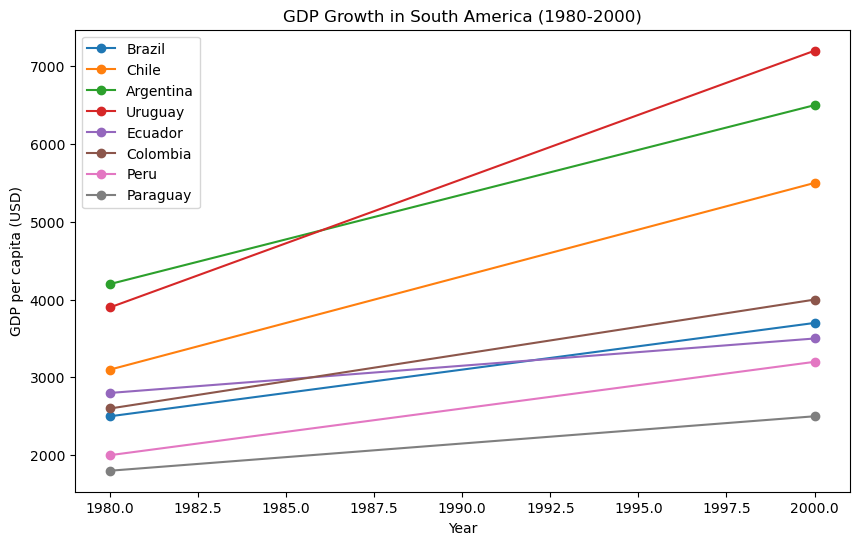

In [21]:
# Economic indicators data
economic_data = {
    "Country": ["Brazil", "Chile", "Argentina", "Uruguay", "Ecuador", "Colombia", "Peru", "Paraguay"],
    "GDP_1980": [2500, 3100, 4200, 3900, 2800, 2600, 2000, 1800],
    "GDP_2000": [3700, 5500, 6500, 7200, 3500, 4000, 3200, 2500],
    "Unemployment_1980": [9.5, 12.0, 8.5, 10.2, 11.1, 12.3, 15.0, 7.5],
    "Unemployment_2000": [7.2, 9.0, 17.0, 7.5, 10.0, 11.5, 9.8, 6.5]
}
economic_df = pd.DataFrame(economic_data)

# Merge with population data and GDP growrth 
merged_econ_df = merged_df.merge(economic_df, on="Country")


fig, ax = plt.subplots(figsize=(10, 6))
for country in selected_countries:
    plt.plot([1980, 2000], 
             economic_df[economic_df['Country'] == country].iloc[:, 1:3].values.flatten(), 
             marker='o', label=country)
plt.title("GDP Growth in South America (1980-2000)")
plt.xlabel("Year")
plt.ylabel("GDP per capita (USD)")
plt.legend()
plt.show()

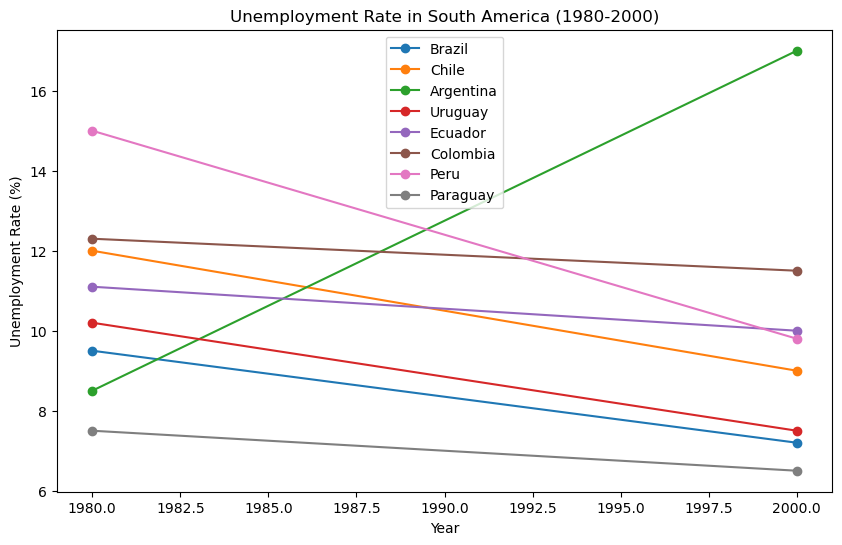

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
for country in selected_countries:
    plt.plot([1980, 2000], 
             economic_df[economic_df['Country'] == country].iloc[:, 3:].values.flatten(), 
             marker='o', label=country)
plt.title("Unemployment Rate in South America (1980-2000)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()


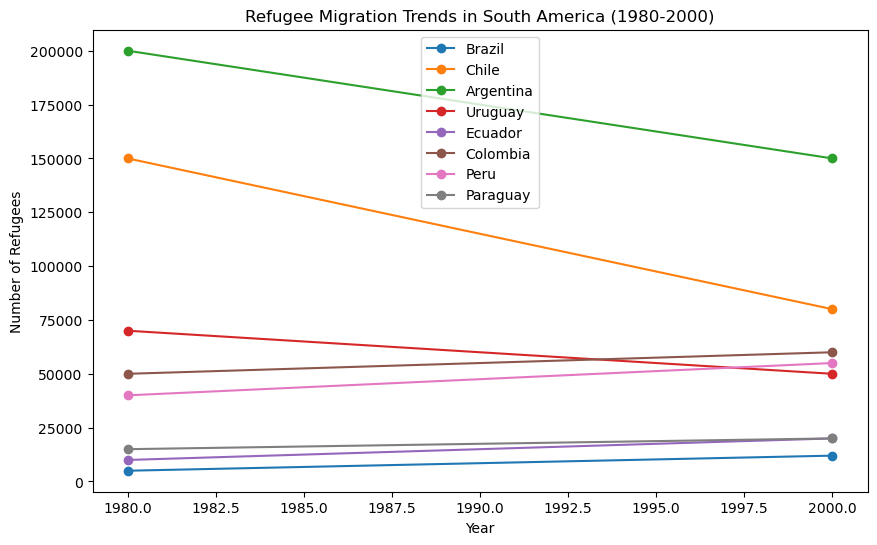

In [30]:
# Create refugee migration data & refugee migration trends
migration_data = {
    "Country": ["Brazil", "Chile", "Argentina", "Uruguay", "Ecuador", "Colombia", "Peru", "Paraguay"],
    "Refugees_1980": [5000, 150000, 200000, 70000, 10000, 50000, 40000, 15000],
    "Refugees_2000": [12000, 80000, 150000, 50000, 20000, 60000, 55000, 20000]
}
migration_df = pd.DataFrame(migration_data)
merged_migration_df = merged_df.merge(migration_df, on="Country")

fig, ax = plt.subplots(figsize=(10, 6))
for country in selected_countries:
    plt.plot([1980, 2000], 
             migration_df[migration_df['Country'] == country].iloc[:, 1:].values.flatten(), 
             marker='o', label=country)
plt.title("Refugee Migration Trends in South America (1980-2000)")
plt.xlabel("Year")
plt.ylabel("Number of Refugees")
plt.legend()
plt.show()

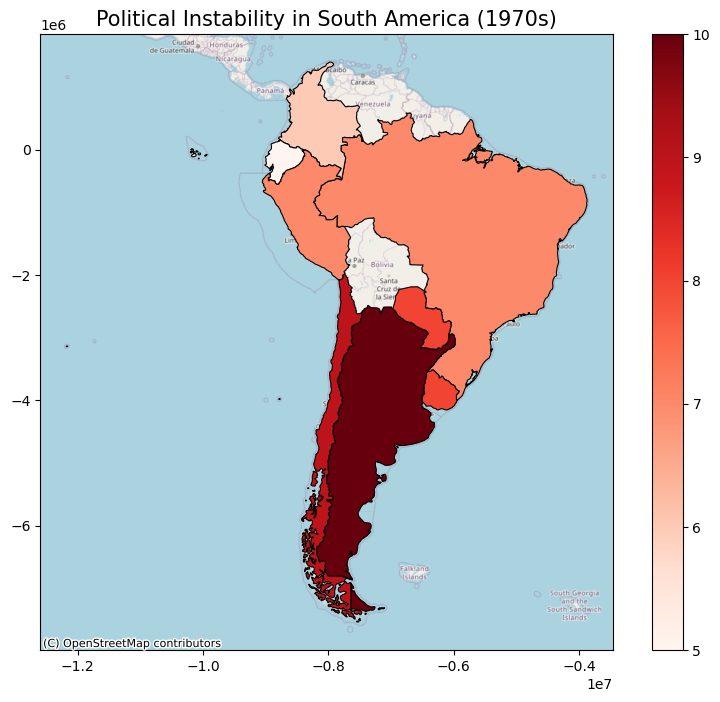

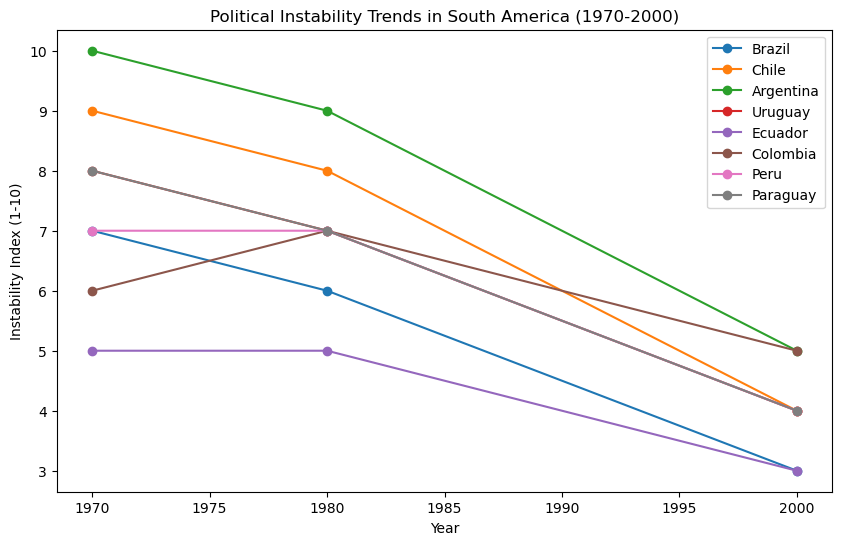

In [32]:
# Filter dataset to include selected countries affected by Operation Condor
selected_countries = ["Brazil", "Chile", "Argentina", "Uruguay", "Ecuador", "Colombia", "Peru", "Paraguay"]
filtered_df = southamerica[southamerica["name"].isin(selected_countries)]

# Historical data: Political Instability Index (scale: 1-10, higher = more instability)
political_instability_data = {
    "Country": ["Brazil", "Chile", "Argentina", "Uruguay", "Ecuador", "Colombia", "Peru", "Paraguay"],
    "Instability_1970s": [7, 9, 10, 8, 5, 6, 7, 8],
    "Instability_1980s": [6, 8, 9, 7, 5, 7, 7, 7],
    "Instability_2000s": [3, 4, 5, 4, 3, 5, 4, 4]
}
instability_df = pd.DataFrame(political_instability_data)

# Merge instability data with geographical data
merged_instability_df = filtered_df.merge(instability_df, left_on="name", right_on="Country")
merged_instability_df = merged_instability_df.to_crs(epsg=3857)

# Plot Political Instability Map (1970s)
fig, ax = plt.subplots(figsize=(10, 8))
merged_instability_df.plot(column="Instability_1970s", cmap="Reds", linewidth=0.8, edgecolor="black", legend=True, ax=ax)
ax.set_title("Political Instability in South America (1970s)", fontsize=15)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

# Plot Political Instability Trends Over Time
fig, ax = plt.subplots(figsize=(10, 6))
for country in selected_countries:
    plt.plot([1970, 1980, 2000], 
             instability_df[instability_df['Country'] == country].iloc[:, 1:].values.flatten(), 
             marker='o', label=country)
plt.title("Political Instability Trends in South America (1970-2000)")
plt.xlabel("Year")
plt.ylabel("Instability Index (1-10)")
plt.legend()
plt.show()
